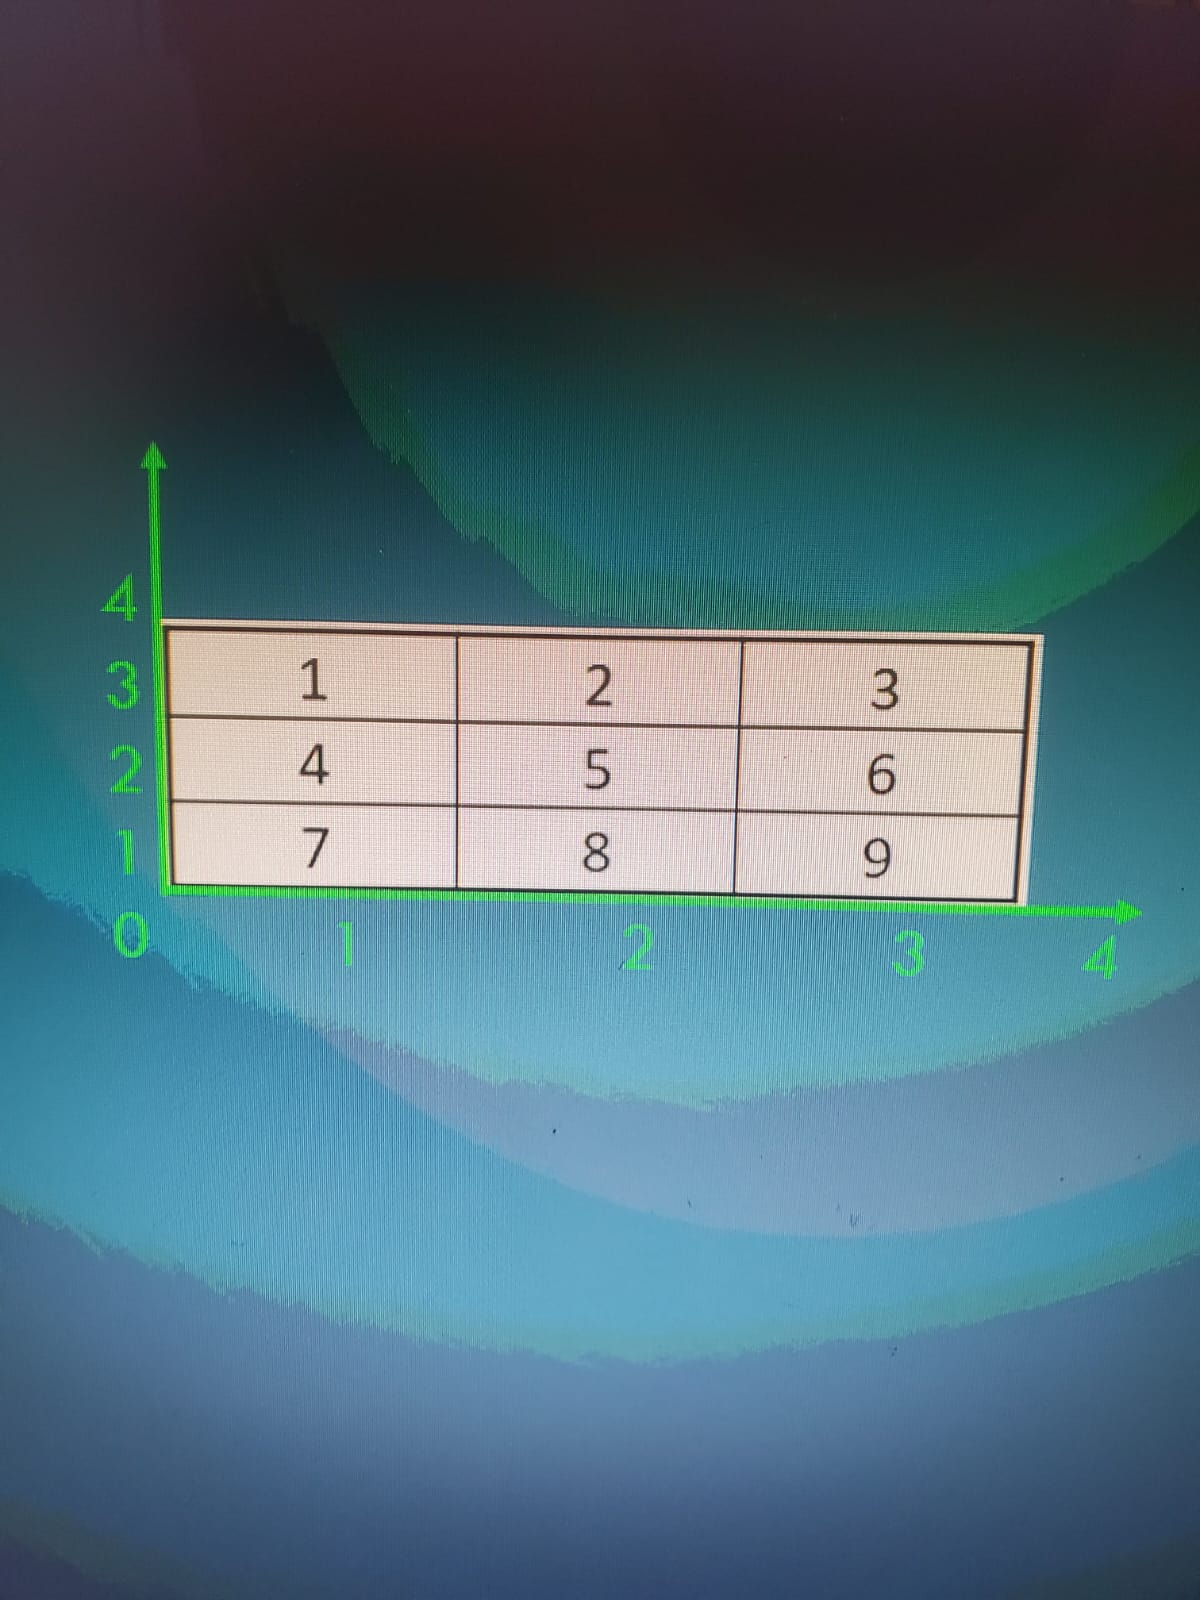

In [4]:
#Uniform Cost Search
#dfs and bfs search finding agent
#depth first search finding agent

#Greedy Best First Search
import operator
class Environment(object):
    #def __init__(self):
    MyGraph = {"1": set(["2", "4"]),
               "2": set(["1", "3", "5"]),
               "3": set(["2", "6"]),
               "4": set(["1", "5", "7"]),
               "5": set(["2", "4", "6", "8"]),
               "6": set(["3", "5", "9"]),
               "7": set(["4", "8"]),
               "8": set(["5", "7", "9"]),
               "9": set(["6", "8"]),}
    Cost = {str(["1", "2"]) : "3", str(["1", "4"]) : "5",
            str(["2", "1"]) : "3", str(["2", "3"]) : "5", str(["2", "5"]) : "7",
            str(["3", "2"]) : "5", str(["3", "6"]) : "9",
            str(["4", "1"]) : "5", str(["4", "5"]) : "9", str(["4", "7"]) : "11",
            str(["5", "2"]) : "7", str(["5", "4"]) : "9", str(["5", "6"]) : "11", str(["5", "8"]) : "13",
            str(["6", "3"]) : "9", str(["6", "5"]) : "11", str(["6", "9"]) : "15",
            str(["7", "4"]) : "11", str(["7", "8"]) : "15",
            str(["8", "5"]) : "13", str(["8", "7"]) : "15", str(["8", "9"]) : "17",
            str(["9", "6"]) : "15", str(["9", "8"]) : "17",
           }
    
    myCoordinates = {"1": ["1", "3"],
                   "2": ["2", "3"],
                   "3": ["3", "3"],
                   "4": ["1", "2"],
                   "5": ["2", "2"],
                   "6": ["3", "2"],
                   "7": ["1", "1"],
                   "8": ["2", "1"],
                   "9": ["3", "1"],
                  } 
    
    State = "1"
    TheGoal = "9"
        
class Agent(Environment):
    def dfs(self, graph, start, goal): 
        stack = [(start, [start])] 
        p = [] 
        while stack: 
            (vertex, path) = stack.pop() 
            for next in graph[vertex] - set(path): 
                if next == goal: 
                    p.append(path + [next]) 
                else:
                    stack.append((next, path + [next]))      
        return p
    
    def bfs(self, graph, start, goal): 
        stack = [(start, [start])] 
        p = [] 
        while stack: 
            (vertex, path) = stack.pop(0) 
            for next in graph[vertex] - set(path): 
                if next == goal: 
                    p.append(path + [next])
                    return p
                else:
                    stack.append((next, path + [next]))
        return p
    
    def getCost(path_to_cost):
        i = 0
        pathCost = 0
        while i<len(path_to_cost) - 1:
            l = []
            l.append(path_to_cost[i])
            l.append(path_to_cost[i + 1])
            pathCost = pathCost + int(Environment.Cost[str(l)])
            i = i + 1
            
        return pathCost
        
    
    def UCS(self, graph, start, goal):
        stack = [(start, [start])] 
        p = []
        c = []
        leastCost = 1000
        while stack: 
            (vertex, path) = stack.pop() 
            for next in graph[vertex] - set(path): 
                if next == goal: 
                    pathCost = Agent.getCost(path + [next])
                    print("Path: ", path+[next], "Path Cost: ", pathCost)
                    if pathCost < leastCost:
                        leastCost = pathCost
                        p = path + [next]
                else:
                    stack.append((next, path + [next]))      
        return p

    
    def __init__(self, Environment):
        print("Depth First Search: ", self.dfs(Environment.MyGraph, Environment.State, Environment.TheGoal))
        print("Breadth First Search: ", self.bfs(Environment.MyGraph, Environment.State, Environment.TheGoal))
        print("Uniform Cost Search: ", self.UCS(Environment.MyGraph, Environment.State, Environment.TheGoal))
        print("gbfs: ", self.gbfs(Environment.MyGraph, Environment.State, Environment.TheGoal))
        
        
    def getHeuristic(vertex, goal):
        v = []
        g = []
        for i in Environment.myCoordinates[vertex]:
            v.append(int(i))
        for i in Environment.myCoordinates[goal]:
            g.append(int(i))
            
        m = abs(v[0] - g[0]) + abs(v[1] - g[1])
        return m
        
        
        
    def gbfs(self, graph, start, goal):
        p = []
        p.append(start)
        while True:
            neighbor = graph[start]
            heuristics = {}
            for i in neighbor.difference(p):
                heuristics[i] = Agent.getHeuristic(i, goal)
            sortedheuristics = sorted(heuristics.items(), key = operator.itemgetter(1))
            h = (next(iter(sortedheuristics[0])))
            p.append(h)
            if h == goal:
                return p
            else:
                start = h
        
        
TheEnvironment = Environment()
TheAgent = Agent(TheEnvironment)

Depth First Search:  [['1', '4', '5', '8', '9'], ['1', '4', '5', '2', '3', '6', '9'], ['1', '4', '5', '6', '9'], ['1', '4', '7', '8', '9'], ['1', '4', '7', '8', '5', '2', '3', '6', '9'], ['1', '4', '7', '8', '5', '6', '9'], ['1', '2', '3', '6', '9'], ['1', '2', '3', '6', '5', '4', '7', '8', '9'], ['1', '2', '3', '6', '5', '8', '9'], ['1', '2', '5', '4', '7', '8', '9'], ['1', '2', '5', '8', '9'], ['1', '2', '5', '6', '9']]
Breadth First Search:  [['1', '2', '5', '6', '9']]
Path:  ['1', '4', '5', '8', '9'] Path Cost:  44
Path:  ['1', '4', '5', '2', '3', '6', '9'] Path Cost:  50
Path:  ['1', '4', '5', '6', '9'] Path Cost:  40
Path:  ['1', '4', '7', '8', '9'] Path Cost:  48
Path:  ['1', '4', '7', '8', '5', '2', '3', '6', '9'] Path Cost:  80
Path:  ['1', '4', '7', '8', '5', '6', '9'] Path Cost:  70
Path:  ['1', '2', '3', '6', '9'] Path Cost:  32
Path:  ['1', '2', '3', '6', '5', '4', '7', '8', '9'] Path Cost:  80
Path:  ['1', '2', '3', '6', '5', '8', '9'] Path Cost:  58
Path:  ['1', '2', '5'

In [6]:

import operator
class Environment(object):
    #def __init__(self):
    MyGraph = {"1": set(["2", "4"]),
               "2": set(["1", "3", "5"]),
               "3": set(["2", "6"]),
               "4": set(["1", "5", "7"]),
               "5": set(["2", "4", "6", "8"]),
               "6": set(["3", "5", "9"]),
               "7": set(["4", "8"]),
               "8": set(["5", "7", "9"]),
               "9": set(["6", "8"]),}
    Cost = {str(["1", "2"]) : "3", str(["1", "4"]) : "5",
            str(["2", "1"]) : "3", str(["2", "3"]) : "5", str(["2", "5"]) : "7",
            str(["3", "2"]) : "5", str(["3", "6"]) : "9",
            str(["4", "1"]) : "5", str(["4", "5"]) : "9", str(["4", "7"]) : "11",
            str(["5", "2"]) : "7", str(["5", "4"]) : "9", str(["5", "6"]) : "11", str(["5", "8"]) : "13",
            str(["6", "3"]) : "9", str(["6", "5"]) : "11", str(["6", "9"]) : "15",
            str(["7", "4"]) : "11", str(["7", "8"]) : "15",
            str(["8", "5"]) : "13", str(["8", "7"]) : "15", str(["8", "9"]) : "17",
            str(["9", "6"]) : "15", str(["9", "8"]) : "17",
           }
    
    myCoordinates = {"1": ["1", "3"],
                   "2": ["2", "3"],
                   "3": ["3", "3"],
                   "4": ["1", "2"],
                   "5": ["2", "2"],
                   "6": ["3", "2"],
                   "7": ["1", "1"],
                   "8": ["2", "1"],
                   "9": ["3", "1"],
                  } 
    
    State = "1"
    TheGoal = "9"
        
class Agent(Environment):
    def dfs(self, graph, start, goal): 
        stack = [(start, [start])] 
        p = [] 
        while stack: 
            (vertex, path) = stack.pop() 
            for next in graph[vertex] - set(path): 
                if next == goal: 
                    p.append(path + [next]) 
                else:
                    stack.append((next, path + [next]))      
        return p
    
    def bfs(self, graph, start, goal): 
        stack = [(start, [start])] 
        p = [] 
        while stack: 
            (vertex, path) = stack.pop(0) 
            for next in graph[vertex] - set(path): 
                if next == goal: 
                    p.append(path + [next])
                    return p
                else:
                    stack.append((next, path + [next]))
        return p
    
    def getCost(path_to_cost):
        i = 0
        pathCost = 0
        while i<len(path_to_cost) - 1:
            l = []
            l.append(path_to_cost[i])
            l.append(path_to_cost[i + 1])
            pathCost = pathCost + int(Environment.Cost[str(l)])
            i = i + 1
            
        return pathCost
        
    
    def UCS(self, graph, start, goal):
        stack = [(start, [start])] 
        p = []
        c = []
        leastCost = 1000
        while stack: 
            (vertex, path) = stack.pop() 
            for next in graph[vertex] - set(path): 
                if next == goal: 
                    pathCost = Agent.getCost(path + [next])
                    print("Path: ", path+[next], "Path Cost: ", pathCost)
                    if pathCost < leastCost:
                        leastCost = pathCost
                        p = path + [next]
                else:
                    stack.append((next, path + [next]))      
        return p

    
    def __init__(self, Environment):
        print("Depth First Search: ", self.dfs(Environment.MyGraph, Environment.State, Environment.TheGoal))
        print("Breadth First Search: ", self.bfs(Environment.MyGraph, Environment.State, Environment.TheGoal))
        print("Uniform Cost Search: ", self.UCS(Environment.MyGraph, Environment.State, Environment.TheGoal))
        print("Astar: ", self.Astar(Environment.MyGraph, Environment.State, Environment.TheGoal))
        
        
    def getHeuristic(vertex, goal):
        v = []
        g = []
        for i in Environment.myCoordinates[vertex]:
            v.append(int(i))
        for i in Environment.myCoordinates[goal]:
            g.append(int(i))
            
        m = abs(v[0] - g[0]) + abs(v[1] - g[1])
        return m
        
        
        
    def Astar(self, graph, start, goal):
        p = []
        p.append(start)
        while True:
            neighbor = graph[start]
            heuristics = {}
            for i in neighbor.difference(p):
                l=[]
                l.append(str(start))
                l.append(str(i))
                heuristics[i] = Agent.getHeuristic(i, goal) + Agent.getCost(l)
            sortedheuristics = sorted(heuristics.items(), key = operator.itemgetter(1))
            h = (next(iter(sortedheuristics[0])))
            p.append(h)
            if h == goal:
                return p
            else:
                start = h
        
        
TheEnvironment = Environment()
TheAgent = Agent(TheEnvironment)

Depth First Search:  [['1', '4', '5', '8', '9'], ['1', '4', '5', '2', '3', '6', '9'], ['1', '4', '5', '6', '9'], ['1', '4', '7', '8', '9'], ['1', '4', '7', '8', '5', '2', '3', '6', '9'], ['1', '4', '7', '8', '5', '6', '9'], ['1', '2', '3', '6', '9'], ['1', '2', '3', '6', '5', '4', '7', '8', '9'], ['1', '2', '3', '6', '5', '8', '9'], ['1', '2', '5', '4', '7', '8', '9'], ['1', '2', '5', '8', '9'], ['1', '2', '5', '6', '9']]
Breadth First Search:  [['1', '2', '5', '6', '9']]
Path:  ['1', '4', '5', '8', '9'] Path Cost:  44
Path:  ['1', '4', '5', '2', '3', '6', '9'] Path Cost:  50
Path:  ['1', '4', '5', '6', '9'] Path Cost:  40
Path:  ['1', '4', '7', '8', '9'] Path Cost:  48
Path:  ['1', '4', '7', '8', '5', '2', '3', '6', '9'] Path Cost:  80
Path:  ['1', '4', '7', '8', '5', '6', '9'] Path Cost:  70
Path:  ['1', '2', '3', '6', '9'] Path Cost:  32
Path:  ['1', '2', '3', '6', '5', '4', '7', '8', '9'] Path Cost:  80
Path:  ['1', '2', '3', '6', '5', '8', '9'] Path Cost:  58
Path:  ['1', '2', '5'